<img src= 'http://www.bigbang-datascience.com/wp-content/uploads/2017/09/cropped-Logo-01.jpg' width=500/>

In [11]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymysql


import seaborn as sns
sns.set()  #  Will import Seaborn functionalities
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Disply all Columns
pd.options.display.max_columns=70

### Read the data

Read the data from MySQL that has the TV set as 1 for the price 199 and 0 for the price 299

In [13]:
# Connect to Mysql
db = pymysql.connect("localhost","root","<password>" ,database="ds")
cursor = db.cursor()

In [14]:
query = """
SELECT * from ds.promo_result_user;
"""
pricing=pd.read_sql_query(query,db) 

In [15]:
pricing1=pricing.copy()


In [16]:
pricing1.head()

,user_id,promo_date,source,device,OS,test,price,booked,promo_date_format,state,country,date_month,date_year,date_month_year,date_month_day,target_variable,earnings
0,86119307,2017-04-23,Facebook,desktop,windows,0,199,0,2017-04-23,PA,USA,April,2017,2017-04,Sun,1,0
1,98581117,2017-06-22,Unknown,desktop,mac,0,199,0,2017-06-22,PA,USA,June,2017,2017-06,Thu,1,0
2,93790631,2017-05-31,Facebook,mobile,iOS,0,199,0,2017-05-31,PA,USA,May,2017,2017-05,Wed,1,0
3,28464260,2017-06-27,Google,desktop,windows,0,199,0,2017-06-27,PA,USA,June,2017,2017-06,Tue,1,0
4,72639531,2017-06-28,Unknown,mobile,android,1,299,0,2017-06-28,NJ,USA,June,2017,2017-06,Wed,0,0


In [17]:
pricing1.drop('promo_date',axis=1,inplace=True)
pricing1.drop('promo_date_format',axis=1,inplace=True)
pricing1.drop('country',axis=1,inplace=True)
pricing1.drop('date_year',axis=1,inplace=True)
pricing1.drop('user_id',axis=1,inplace=True)
pricing1.drop('date_month_year',axis=1,inplace=True)
pricing1.drop('target_variable',axis=1,inplace=True)
pricing1.drop('earnings',axis=1,inplace=True)

In [22]:
pricing1.head()

,source,device,OS,test,price,booked,state,date_month,date_month_day
0,Facebook,desktop,windows,0,199,0,PA,April,Sun
1,Unknown,desktop,mac,0,199,0,PA,June,Thu
2,Facebook,mobile,iOS,0,199,0,PA,May,Wed
3,Google,desktop,windows,0,199,0,PA,June,Tue
4,Unknown,mobile,android,1,299,0,NJ,June,Wed


In [23]:
pricing1.isna().sum

<bound method DataFrame.sum of         source  device     OS   test  price  booked  state  date_month  \
0        False   False  False  False  False   False  False       False   
1        False   False  False  False  False   False  False       False   
2        False   False  False  False  False   False  False       False   
3        False   False  False  False  False   False  False       False   
4        False   False  False  False  False   False  False       False   
...        ...     ...    ...    ...    ...     ...    ...         ...   
233955   False   False  False  False  False   False  False       False   
233956   False   False  False  False  False   False  False       False   
233957   False   False  False  False  False   False  False       False   
233958   False   False  False  False  False   False  False       False   
233959   False   False  False  False  False   False  False       False   

        date_month_day  
0                False  
1                False  
2    

In [24]:
pricing1.price.value_counts()

199    149647
299     84313
Name: price, dtype: int64

In [26]:
#Splitting Data as per cluster
df_cluster_0 = pricing1[pricing1['booked'] == 0]
df_cluster_1 = pricing1[pricing1['booked'] == 1]

In [27]:
df_cluster_1.price.value_counts()

199    2957
299    1311
Name: price, dtype: int64

In [29]:
df_cluster_0_199 = df_cluster_0[df_cluster_0['price']==199]
df_cluster_0_299 = df_cluster_0[df_cluster_0['price']==299]

In [31]:
print('Adding all data in AB testing for equal records of 199 and 299')
df_cluster_r0 = df_cluster_1
df_cluster_r1 = df_cluster_0_199.sample(1000)
df_cluster_r2 = df_cluster_0_299.sample(2700)
pricing_AB= pd.concat([df_cluster_r0, df_cluster_r1,df_cluster_r2], axis=0)

Adding all data in AB testing for equal records of 199 and 299


In [32]:
pricing_AB.price.value_counts()

299    4011
199    3957
Name: price, dtype: int64

In [33]:
to_dummy = pricing_AB.select_dtypes(exclude=[np.number]).columns
pricing_dummies  = pd.get_dummies(pricing_AB, prefix = to_dummy, columns = to_dummy, drop_first = True)

In [34]:
pricing_dummies.head()

,test,price,booked,source_Bing,source_Facebook,source_Google,source_Other,source_Unknown,device_mobile,OS_iOS,OS_linux,OS_mac,OS_other,OS_windows,state_NY,state_PA,date_month_July,date_month_June,date_month_March,date_month_May,date_month_day_Mon,date_month_day_Sat,date_month_day_Sun,date_month_day_Thu,date_month_day_Tue,date_month_day_Wed
9,0,199,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0
114,0,199,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
148,0,199,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0
185,1,299,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
244,0,199,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0


In [35]:
pricing_dummies.shape

(7968, 26)

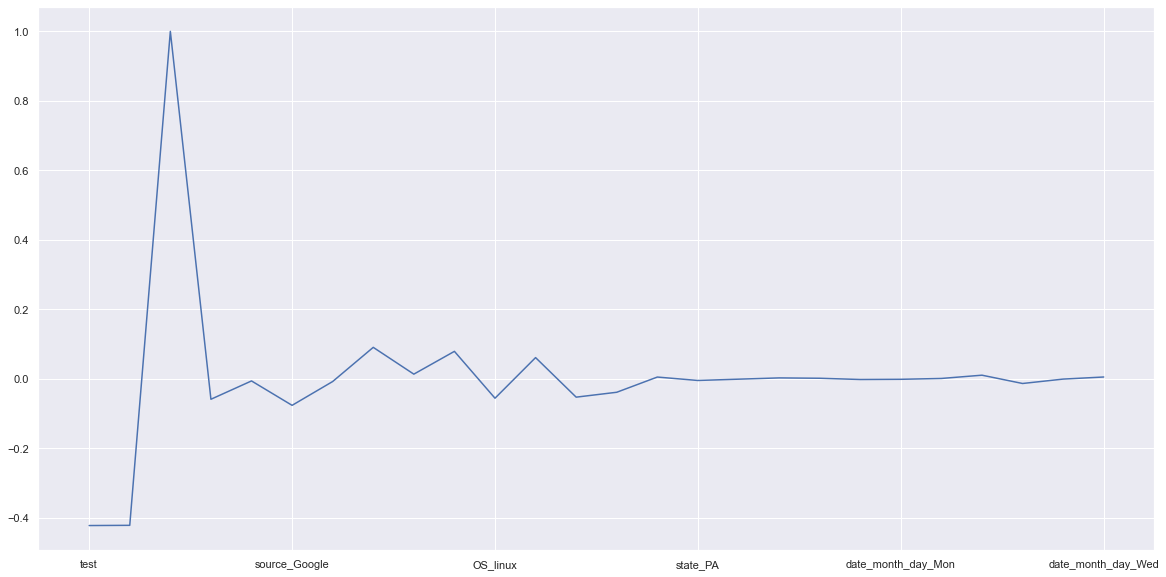

In [36]:
plt.rcParams['figure.figsize'] = 20,10  # control plot sizeimport seaborn as sns
pricing_dummies.corr()['booked'].plot()

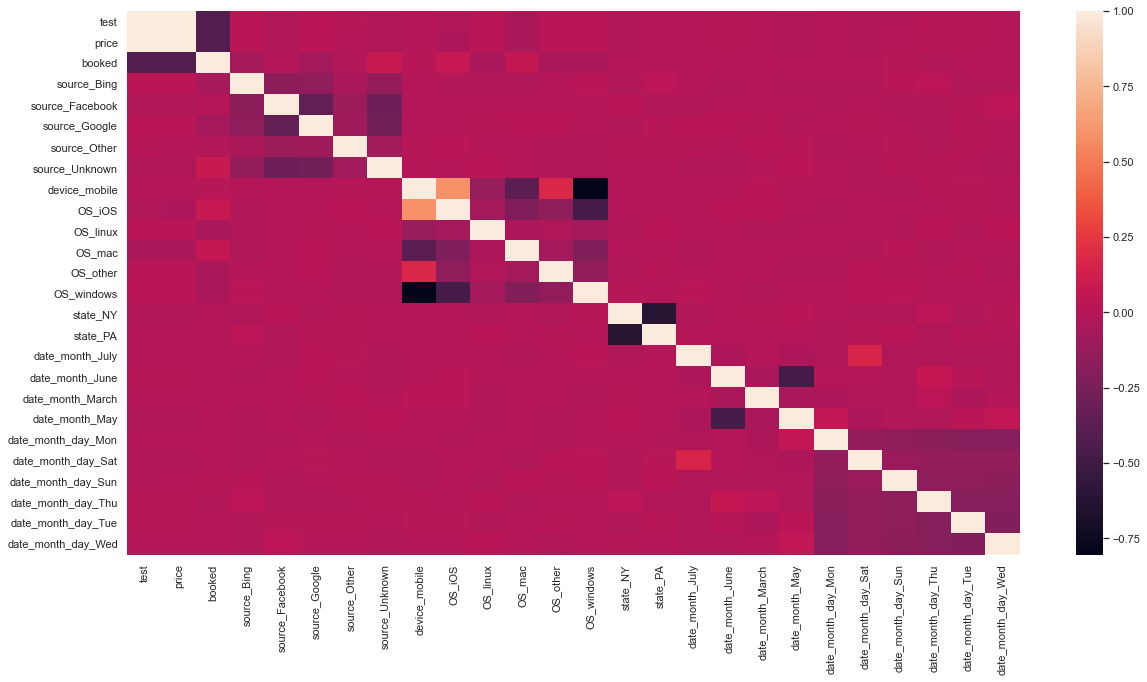

In [37]:
plt.rcParams['figure.figsize'] = 20,10  # control plot sizeimport seaborn as sns
sns.heatmap(pricing_dummies.corr())

In [38]:
corr_matrix = pricing_dummies.corr()
c = corr_matrix.abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

#first element of sol series is the pair with the biggest correlation
sol

test             price                 0.997742
device_mobile    OS_iOS                0.590420
                 OS_other              0.177059
date_month_July  date_month_day_Sat    0.160184
booked           source_Unknown        0.090665
                                         ...   
test             booked               -0.422120
date_month_June  date_month_May       -0.473135
OS_iOS           OS_windows           -0.474548
state_NY         state_PA             -0.618680
device_mobile    OS_windows           -0.803747
Length: 325, dtype: float64

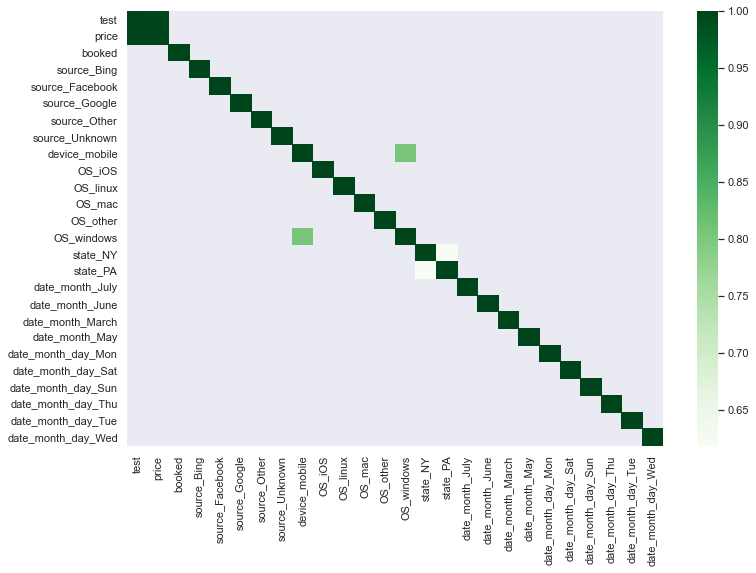

In [39]:
corr = corr_matrix.abs()

kot = corr[corr>=.6]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [40]:
# Create correlation matrix
corr_matrix = pricing_dummies.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
to_drop

['price', 'OS_windows', 'state_PA']

In [41]:
# Disply all Columns


#clean_Office_Supply.corr().unstack().sort_values().drop_duplicates()
pricing_dummies[pricing_dummies.columns[0:]].corr()['booked'][:].sort_values(axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
#sales_corr.sort_values(kind="quicksort")

booked                1.000000
source_Unknown        0.090665
OS_iOS                0.079155
OS_mac                0.061188
device_mobile         0.013556
date_month_day_Sun    0.010563
date_month_day_Wed    0.005347
state_NY              0.005198
date_month_June       0.002740
date_month_March      0.001748
date_month_day_Sat    0.001171
date_month_day_Tue   -0.000662
date_month_July      -0.000914
date_month_day_Mon   -0.001295
date_month_May       -0.001882
state_PA             -0.004650
source_Facebook      -0.005970
source_Other         -0.007663
date_month_day_Thu   -0.013326
OS_windows           -0.038576
OS_other             -0.052633
OS_linux             -0.055710
source_Bing          -0.058713
source_Google        -0.076205
price                -0.421495
test                 -0.422120
Name: booked, dtype: float64

In [42]:
# Splitting the dataset into the Training set and Test set
X = pricing_dummies.drop('booked', axis = 1)
y = pricing_dummies.booked


from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X,y,
                                               test_size = .2,
                                               random_state= 45)

In [43]:
#Gradient Boost

from sklearn.ensemble import GradientBoostingClassifier
# Confusion Matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [44]:
# Initialize boosted tree
GBModel = GradientBoostingClassifier()

# Fit boosted tree
GBModel.fit(training_features, training_target)

GradientBoostingClassifier()

In [45]:
# Predicting the Test set results
GB_pred = GBModel.predict(test_features)

In [46]:
# Making the Confusion Matrix
CMGB= confusion_matrix(test_target, GB_pred)
CMGB

array([[533, 211],
       [260, 590]], dtype=int64)

In [47]:
# Accuracy Score
ACGB= accuracy_score(test_target, GB_pred )
print(ACGB)

0.704516938519448


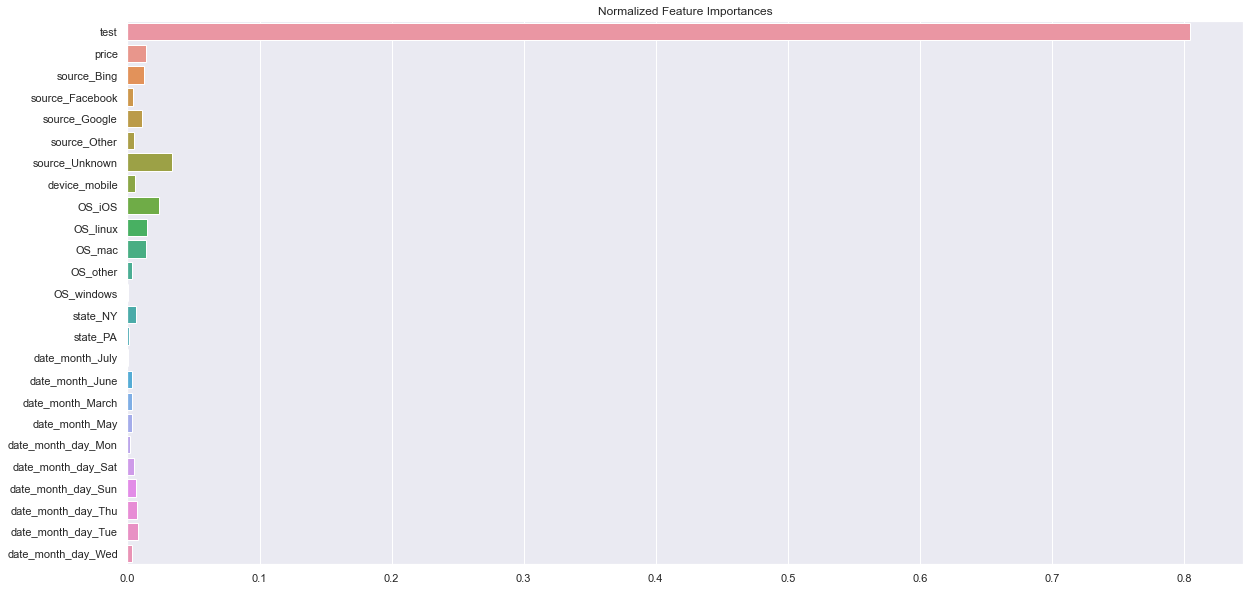

In [48]:
# Plot feature importances
import seaborn as sns
plt.title('Normalized Feature Importances')
sns.barplot(y=X.columns, x=GBModel.feature_importances_)
plt.show()

In [49]:
COLS_TO_KEEP = [    
'booked'
,'device_mobile'         
,'OS_iOS'              
,'OS_mac'              
,'source_Google'       
,'OS_other'             
,'date_month_day_Mon'   
,'state_PA'             
,'date_month_May'      
,'date_month_March'  
,'date_month_day_Sat'  
,'source_Unknown'       
,'date_month_day_Sun'  
,'source_Other'        
,'date_month_day_Wed'   
,'date_month_day_Thu'   
,'date_month_July'      
,'source_Bing'         
,'date_month_June'    
,'state_NY'             
,'date_month_day_Tue'   
,'source_Facebook'     
#,'earnings'            
,'OS_windows'         
,'OS_linux'            
,'test'                
,'price']


In [50]:
#pricing_regression = pricing_dummies.copy()

In [51]:
pricing_dummies = pricing_dummies[COLS_TO_KEEP].copy()

In [52]:
pricing_dummies

,booked,device_mobile,OS_iOS,OS_mac,source_Google,OS_other,date_month_day_Mon,state_PA,date_month_May,date_month_March,date_month_day_Sat,source_Unknown,date_month_day_Sun,source_Other,date_month_day_Wed,date_month_day_Thu,date_month_July,source_Bing,date_month_June,state_NY,date_month_day_Tue,source_Facebook,OS_windows,OS_linux,test,price
9,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,199
114,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,199
148,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,199
185,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,299
244,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128028,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,299
88254,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,299
44037,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,299
40823,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,299


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
training_features = scaler.fit_transform(training_features)
test_features = scaler.fit_transform(test_features)

In [54]:
pricing_dummies.price.value_counts()

299    4011
199    3957
Name: price, dtype: int64

In [55]:
pricing_dummies.booked.value_counts()

1    4268
0    3700
Name: booked, dtype: int64

In [56]:
training_features

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 0., 1.]])

### 1.4 Establishing a Baseline
Establishing a baseline is one of the first steps that should be done in any machine learning
project. A baseline is a simple model we train in the data in order to determine accuracy and
compare to the real models we're going to try. This helps us determine whether the models
we try are actually providing any kind of improvements or not.  
One type of model that we can use as a baselines is called a dummy model. Dummy
models do not learn anything from the data, they just generate their decision by following a
rule that may or may not be related to the data. For example, a dummy model for our
problem here is one that outputs 0 or 1 at random with a 50% chance for each; this is an
example of a dummy rule that is not related to the data. Another dummy model is one that
always outputs the most frequent label in the training data; this dummy model is related to
the data, but it does not learn anything from it.  
These kinds of dummy models are provided in scikit-learn under the dummy module. All
of them are implemented in the DummyClassifier class, which accepts a strategy
parameter at initialization. This strategy parameter determines which rule the model is going
to use. Here, we're going to use the most_frequent strategy, which always returns the most
frequent label in the training data.



### Using a Dummy Classifier

As a first classifier, you can apply the built-in [`DummyClassifier` class from `sklearn.dummy`](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) to set a baseline for performance of our future models.  This classifier does not actually use the feature matrix `X_digits_train`; classification decisions are made using the target vector `y_digits_train` only.  There are a few strategies, but we'll start with the `'most_frequent'` strategy.  That is, the `predict` method always returns the majority class. For our binary digit classification problem, this would be `-1` (because the `1` classification is reserved for `9`s and most of the digits are not `9`s).

In [57]:
from sklearn.dummy import DummyClassifier

dummy_baseline = DummyClassifier(strategy="most_frequent")

dummy_baseline.fit(training_features, training_target)


DummyClassifier(strategy='most_frequent')

Having applied the `fit` method to the training data, you can use the `predict` method to see how this estimator classifies the data. Unsurprisingly, it returns a vector of all `-1`s (because that is the majority class for this data).

In [58]:
test_target_pred = dummy_baseline.predict(test_features)
print(test_target_pred)

[1 1 1 ... 1 1 1]


You can find the fraction of correct classifications using the method `score` with the test data:

In [59]:
score = dummy_baseline.score(test_features, test_target)
print('The fraction of correct classifications is: {:5.3f}'.format(score))

The fraction of correct classifications is: 0.533


Using `dummy.score` is equivalent to explicitly comparing the entries of `y_digits_pred` to `y_digits_test`, counting the number of correct classifications, and dividing by the number of classifications in total. 

For classification problems, a *confusion matrix* is a more detailed description of the accuracy of a classifier. It contains entries for the actual values as rows and predicted values as columns. This means we have:

| $~$ | **predicted  (-1)** | **predicted (+1)** |
| ---- | ----------- | ---------- |
| **actual (-1)** |  true negative | false positive |
| **actual (+1)** |  false negative | true positive |


The preceding definition generalizes to the multi-class classification problems as well.
In *Scikit-Learn*, the `confusion_matrix` function takes as arguments the actual labels followed by the predicted labels (labelled in ascending order according to the class labels). From the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html):

> `sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)`
>
> Compute confusion matrix to evaluate the accuracy of a classification
>
> By definition a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ but predicted to be in group $j$.
>
> Thus in binary classification, the count of true negatives is $C_{0,0}$, false negatives is $C_{1,0}$, true positives is $C_{1,1}$, and false positives is $C_{0,1}$.

In [72]:
# Import Classifiers packages
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression  # Class
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier #For Classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [73]:
#from sklearn.model_selection import KFold
from sklearn import model_selection

# Spot Check Algorithms
scoring = 'accuracy'
models = []
models.append(('LRM  ', LogisticRegression(random_state = 45, solver='newton-cg', max_iter=1000)))
#models.append(('LDA  ', LinearDiscriminantAnalysis()))
models.append(('KNN  ', KNeighborsClassifier(n_neighbors = 57  , metric = 'minkowski', p = 2)))
models.append(('CART ', DecisionTreeClassifier(criterion = 'entropy', random_state = 45)))
models.append(('GNB  ', GaussianNB()))
models.append(('SVM  ', SVC(kernel = 'linear', random_state = 45)))
models.append(('KSVM ', SVC(kernel = 'rbf', random_state = 45)))
models.append(('ABM  ', AdaBoostClassifier(random_state=45 , n_estimators=  100, learning_rate = .5, algorithm = 'SAMME.R')))
models.append(('GBM  ', GradientBoostingClassifier()))
models.append(('RFM  ', RandomForestClassifier(n_estimators=80, max_features=7, oob_score= True, random_state= 42)))
models.append(('ExT  ', ExtraTreesClassifier()))
models.append(('XGBoost ', XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1,subsample= 0.8, min_child_weight= 1, max_depth= 4, gamma= 1, colsample_bytree= 1)))
models.append(('CATB ', CatBoostClassifier(iterations=250, depth=10, learning_rate=0.7, loss_function='Logloss')))
results = []
names = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, training_features, training_target,  scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s  : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LRM    : 0.707404 (0.007230)
KNN    : 0.707562 (0.006183)
CART   : 0.618134 (0.015136)
GNB    : 0.680417 (0.015471)
SVM    : 0.710072 (0.006795)
KSVM   : 0.710542 (0.007282)
ABM    : 0.706619 (0.008271)
GBM    : 0.707404 (0.007491)
RFM    : 0.641510 (0.012114)
ExT    : 0.627390 (0.013527)
[15:45:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:45:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  veri

131:	learn: 0.3447194	total: 492ms	remaining: 440ms
132:	learn: 0.3446047	total: 496ms	remaining: 436ms
133:	learn: 0.3445148	total: 499ms	remaining: 432ms
134:	learn: 0.3443100	total: 503ms	remaining: 428ms
135:	learn: 0.3442339	total: 506ms	remaining: 425ms
136:	learn: 0.3440838	total: 511ms	remaining: 421ms
137:	learn: 0.3440097	total: 514ms	remaining: 417ms
138:	learn: 0.3439573	total: 518ms	remaining: 413ms
139:	learn: 0.3438604	total: 522ms	remaining: 410ms
140:	learn: 0.3436801	total: 526ms	remaining: 406ms
141:	learn: 0.3435916	total: 529ms	remaining: 403ms
142:	learn: 0.3435145	total: 533ms	remaining: 399ms
143:	learn: 0.3433661	total: 536ms	remaining: 395ms
144:	learn: 0.3432704	total: 540ms	remaining: 391ms
145:	learn: 0.3431880	total: 544ms	remaining: 388ms
146:	learn: 0.3431407	total: 548ms	remaining: 384ms
147:	learn: 0.3429579	total: 551ms	remaining: 380ms
148:	learn: 0.3428875	total: 555ms	remaining: 376ms
149:	learn: 0.3428273	total: 558ms	remaining: 372ms
150:	learn: 

49:	learn: 0.3788822	total: 181ms	remaining: 724ms
50:	learn: 0.3779671	total: 185ms	remaining: 723ms
51:	learn: 0.3775270	total: 189ms	remaining: 720ms
52:	learn: 0.3769372	total: 192ms	remaining: 715ms
53:	learn: 0.3759801	total: 196ms	remaining: 713ms
54:	learn: 0.3753679	total: 200ms	remaining: 711ms
55:	learn: 0.3748198	total: 204ms	remaining: 708ms
56:	learn: 0.3740494	total: 209ms	remaining: 706ms
57:	learn: 0.3733602	total: 212ms	remaining: 703ms
58:	learn: 0.3727688	total: 216ms	remaining: 699ms
59:	learn: 0.3724295	total: 220ms	remaining: 695ms
60:	learn: 0.3719412	total: 223ms	remaining: 690ms
61:	learn: 0.3714321	total: 226ms	remaining: 686ms
62:	learn: 0.3708658	total: 230ms	remaining: 682ms
63:	learn: 0.3705647	total: 233ms	remaining: 678ms
64:	learn: 0.3699175	total: 237ms	remaining: 674ms
65:	learn: 0.3692690	total: 241ms	remaining: 671ms
66:	learn: 0.3689290	total: 244ms	remaining: 668ms
67:	learn: 0.3685286	total: 248ms	remaining: 665ms
68:	learn: 0.3679335	total: 253

236:	learn: 0.3433419	total: 877ms	remaining: 48.1ms
237:	learn: 0.3433158	total: 881ms	remaining: 44.4ms
238:	learn: 0.3432829	total: 885ms	remaining: 40.7ms
239:	learn: 0.3432633	total: 889ms	remaining: 37ms
240:	learn: 0.3432436	total: 892ms	remaining: 33.3ms
241:	learn: 0.3432139	total: 896ms	remaining: 29.6ms
242:	learn: 0.3431864	total: 899ms	remaining: 25.9ms
243:	learn: 0.3431620	total: 903ms	remaining: 22.2ms
244:	learn: 0.3430701	total: 907ms	remaining: 18.5ms
245:	learn: 0.3430298	total: 911ms	remaining: 14.8ms
246:	learn: 0.3430081	total: 914ms	remaining: 11.1ms
247:	learn: 0.3429917	total: 918ms	remaining: 7.4ms
248:	learn: 0.3429594	total: 921ms	remaining: 3.7ms
249:	learn: 0.3429175	total: 924ms	remaining: 0us
0:	learn: 0.6006036	total: 3.02ms	remaining: 752ms
1:	learn: 0.5925829	total: 5.23ms	remaining: 649ms
2:	learn: 0.5596308	total: 8.71ms	remaining: 717ms
3:	learn: 0.5495059	total: 12.3ms	remaining: 759ms
4:	learn: 0.5322981	total: 16.2ms	remaining: 795ms
5:	learn: 

167:	learn: 0.3445356	total: 746ms	remaining: 364ms
168:	learn: 0.3444593	total: 752ms	remaining: 360ms
169:	learn: 0.3444150	total: 758ms	remaining: 357ms
170:	learn: 0.3442986	total: 763ms	remaining: 352ms
171:	learn: 0.3442371	total: 768ms	remaining: 348ms
172:	learn: 0.3441759	total: 773ms	remaining: 344ms
173:	learn: 0.3441017	total: 778ms	remaining: 340ms
174:	learn: 0.3439786	total: 783ms	remaining: 336ms
175:	learn: 0.3438995	total: 788ms	remaining: 331ms
176:	learn: 0.3438334	total: 794ms	remaining: 327ms
177:	learn: 0.3437755	total: 800ms	remaining: 324ms
178:	learn: 0.3437214	total: 806ms	remaining: 320ms
179:	learn: 0.3436896	total: 811ms	remaining: 315ms
180:	learn: 0.3436702	total: 817ms	remaining: 311ms
181:	learn: 0.3435627	total: 822ms	remaining: 307ms
182:	learn: 0.3435319	total: 827ms	remaining: 303ms
183:	learn: 0.3434660	total: 833ms	remaining: 299ms
184:	learn: 0.3434467	total: 838ms	remaining: 294ms
185:	learn: 0.3433876	total: 844ms	remaining: 290ms
186:	learn: 

102:	learn: 0.3446160	total: 537ms	remaining: 766ms
103:	learn: 0.3444712	total: 543ms	remaining: 762ms
104:	learn: 0.3440171	total: 548ms	remaining: 757ms
105:	learn: 0.3438861	total: 554ms	remaining: 753ms
106:	learn: 0.3437648	total: 559ms	remaining: 747ms
107:	learn: 0.3435614	total: 564ms	remaining: 742ms
108:	learn: 0.3432668	total: 569ms	remaining: 737ms
109:	learn: 0.3430892	total: 575ms	remaining: 731ms
110:	learn: 0.3428801	total: 580ms	remaining: 726ms
111:	learn: 0.3427247	total: 585ms	remaining: 721ms
112:	learn: 0.3426007	total: 590ms	remaining: 716ms
113:	learn: 0.3423555	total: 596ms	remaining: 711ms
114:	learn: 0.3422696	total: 601ms	remaining: 705ms
115:	learn: 0.3422090	total: 606ms	remaining: 701ms
116:	learn: 0.3420939	total: 612ms	remaining: 696ms
117:	learn: 0.3419105	total: 617ms	remaining: 690ms
118:	learn: 0.3417872	total: 623ms	remaining: 685ms
119:	learn: 0.3416214	total: 628ms	remaining: 681ms
120:	learn: 0.3415009	total: 633ms	remaining: 675ms
121:	learn: 

34:	learn: 0.3907089	total: 184ms	remaining: 1.13s
35:	learn: 0.3888259	total: 188ms	remaining: 1.12s
36:	learn: 0.3877091	total: 194ms	remaining: 1.12s
37:	learn: 0.3868874	total: 200ms	remaining: 1.11s
38:	learn: 0.3853138	total: 206ms	remaining: 1.12s
39:	learn: 0.3840024	total: 211ms	remaining: 1.11s
40:	learn: 0.3826503	total: 218ms	remaining: 1.11s
41:	learn: 0.3822217	total: 224ms	remaining: 1.11s
42:	learn: 0.3810656	total: 231ms	remaining: 1.11s
43:	learn: 0.3797360	total: 236ms	remaining: 1.1s
44:	learn: 0.3789525	total: 242ms	remaining: 1.1s
45:	learn: 0.3777181	total: 248ms	remaining: 1.1s
46:	learn: 0.3769809	total: 254ms	remaining: 1.09s
47:	learn: 0.3760110	total: 259ms	remaining: 1.09s
48:	learn: 0.3752929	total: 265ms	remaining: 1.09s
49:	learn: 0.3747160	total: 271ms	remaining: 1.08s
50:	learn: 0.3738826	total: 276ms	remaining: 1.08s
51:	learn: 0.3732045	total: 281ms	remaining: 1.07s
52:	learn: 0.3727410	total: 287ms	remaining: 1.06s
53:	learn: 0.3724545	total: 293ms	

195:	learn: 0.3440330	total: 1.05s	remaining: 291ms
196:	learn: 0.3439941	total: 1.06s	remaining: 285ms
197:	learn: 0.3439326	total: 1.07s	remaining: 280ms
198:	learn: 0.3438637	total: 1.07s	remaining: 275ms
199:	learn: 0.3437970	total: 1.08s	remaining: 269ms
200:	learn: 0.3437261	total: 1.08s	remaining: 264ms
201:	learn: 0.3436673	total: 1.09s	remaining: 259ms
202:	learn: 0.3435944	total: 1.09s	remaining: 253ms
203:	learn: 0.3435507	total: 1.1s	remaining: 248ms
204:	learn: 0.3435167	total: 1.1s	remaining: 243ms
205:	learn: 0.3434745	total: 1.11s	remaining: 237ms
206:	learn: 0.3434492	total: 1.12s	remaining: 232ms
207:	learn: 0.3433932	total: 1.12s	remaining: 226ms
208:	learn: 0.3433681	total: 1.13s	remaining: 221ms
209:	learn: 0.3433265	total: 1.13s	remaining: 216ms
210:	learn: 0.3432807	total: 1.14s	remaining: 210ms
211:	learn: 0.3432361	total: 1.14s	remaining: 205ms
212:	learn: 0.3431724	total: 1.15s	remaining: 200ms
213:	learn: 0.3430811	total: 1.15s	remaining: 194ms
214:	learn: 0.

In [71]:
#from sklearn.model_selection import KFold
from sklearn import model_selection

# Spot Check Algorithms
scoring = 'precision_macro'
models = []
models.append(('LRM  ', LogisticRegression(random_state = 45, solver='newton-cg', max_iter=1000)))
#models.append(('LDA  ', LinearDiscriminantAnalysis()))
models.append(('KNN  ', KNeighborsClassifier(n_neighbors = 57  , metric = 'minkowski', p = 2)))
models.append(('CART ', DecisionTreeClassifier(criterion = 'entropy', random_state = 45)))
models.append(('GNB  ', GaussianNB()))
models.append(('SVM  ', SVC(kernel = 'linear', random_state = 45)))
models.append(('KSVM ', SVC(kernel = 'rbf', random_state = 45)))
models.append(('ABM  ', AdaBoostClassifier(random_state=45 , n_estimators=  100, learning_rate = .5, algorithm = 'SAMME.R')))
models.append(('GBM  ', GradientBoostingClassifier()))
models.append(('RFM  ', RandomForestClassifier(n_estimators=80, max_features=7, oob_score= True, random_state= 42)))
models.append(('ExT  ', ExtraTreesClassifier()))
models.append(('CATB ', CatBoostClassifier(iterations=250, depth=10, learning_rate=0.7, loss_function='Logloss')))
results = []
names = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, training_features, training_target,  scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s  : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LRM    : 0.706938 (0.007100)
KNN    : 0.706697 (0.005998)
CART   : 0.619065 (0.015626)
GNB    : 0.679256 (0.015719)
SVM    : 0.710219 (0.006355)
KSVM   : 0.710539 (0.007022)
ABM    : 0.706199 (0.007941)
GBM    : 0.706414 (0.007355)
RFM    : 0.639316 (0.012158)
ExT    : 0.627206 (0.014035)
0:	learn: 0.5889443	total: 3.36ms	remaining: 836ms
1:	learn: 0.5563092	total: 6.67ms	remaining: 827ms
2:	learn: 0.5557588	total: 8.27ms	remaining: 681ms
3:	learn: 0.5329510	total: 11.8ms	remaining: 724ms
4:	learn: 0.5290641	total: 14.1ms	remaining: 689ms
5:	learn: 0.5149888	total: 17.4ms	remaining: 709ms
6:	learn: 0.5070261	total: 20.7ms	remaining: 719ms
7:	learn: 0.5063415	total: 23.2ms	remaining: 702ms
8:	learn: 0.5011063	total: 27ms	remaining: 722ms
9:	learn: 0.4946988	total: 30.3ms	remaining: 727ms
10:	learn: 0.4833595	total: 33.9ms	remaining: 737ms
11:	learn: 0.4815355	total: 36.5ms	remaining: 724ms
12:	learn: 0.4767154	total: 42.7ms	remaining: 779ms
13:	learn: 0.4683899	total: 45.9ms	remaining: 

186:	learn: 0.3397681	total: 664ms	remaining: 224ms
187:	learn: 0.3397147	total: 667ms	remaining: 220ms
188:	learn: 0.3396776	total: 670ms	remaining: 216ms
189:	learn: 0.3396054	total: 674ms	remaining: 213ms
190:	learn: 0.3395097	total: 677ms	remaining: 209ms
191:	learn: 0.3394871	total: 680ms	remaining: 206ms
192:	learn: 0.3394497	total: 684ms	remaining: 202ms
193:	learn: 0.3394043	total: 688ms	remaining: 199ms
194:	learn: 0.3393428	total: 692ms	remaining: 195ms
195:	learn: 0.3392695	total: 695ms	remaining: 192ms
196:	learn: 0.3392303	total: 698ms	remaining: 188ms
197:	learn: 0.3391796	total: 702ms	remaining: 184ms
198:	learn: 0.3391425	total: 705ms	remaining: 181ms
199:	learn: 0.3390962	total: 709ms	remaining: 177ms
200:	learn: 0.3390461	total: 712ms	remaining: 174ms
201:	learn: 0.3390083	total: 716ms	remaining: 170ms
202:	learn: 0.3389202	total: 719ms	remaining: 167ms
203:	learn: 0.3388911	total: 723ms	remaining: 163ms
204:	learn: 0.3387880	total: 726ms	remaining: 159ms
205:	learn: 

122:	learn: 0.3523415	total: 415ms	remaining: 429ms
123:	learn: 0.3522330	total: 419ms	remaining: 425ms
124:	learn: 0.3520334	total: 422ms	remaining: 422ms
125:	learn: 0.3519223	total: 425ms	remaining: 418ms
126:	learn: 0.3518491	total: 428ms	remaining: 415ms
127:	learn: 0.3517323	total: 432ms	remaining: 412ms
128:	learn: 0.3515779	total: 435ms	remaining: 408ms
129:	learn: 0.3514585	total: 439ms	remaining: 405ms
130:	learn: 0.3513269	total: 442ms	remaining: 402ms
131:	learn: 0.3511248	total: 446ms	remaining: 398ms
132:	learn: 0.3510307	total: 449ms	remaining: 395ms
133:	learn: 0.3508195	total: 452ms	remaining: 392ms
134:	learn: 0.3506787	total: 456ms	remaining: 388ms
135:	learn: 0.3505636	total: 459ms	remaining: 385ms
136:	learn: 0.3504537	total: 462ms	remaining: 381ms
137:	learn: 0.3503950	total: 466ms	remaining: 378ms
138:	learn: 0.3502833	total: 469ms	remaining: 375ms
139:	learn: 0.3502006	total: 474ms	remaining: 372ms
140:	learn: 0.3500582	total: 477ms	remaining: 369ms
141:	learn: 

51:	learn: 0.3758582	total: 177ms	remaining: 675ms
52:	learn: 0.3738982	total: 181ms	remaining: 673ms
53:	learn: 0.3733819	total: 185ms	remaining: 671ms
54:	learn: 0.3728080	total: 188ms	remaining: 668ms
55:	learn: 0.3714199	total: 192ms	remaining: 667ms
56:	learn: 0.3709785	total: 196ms	remaining: 664ms
57:	learn: 0.3702670	total: 200ms	remaining: 661ms
58:	learn: 0.3697368	total: 203ms	remaining: 658ms
59:	learn: 0.3689082	total: 207ms	remaining: 656ms
60:	learn: 0.3682624	total: 211ms	remaining: 653ms
61:	learn: 0.3679245	total: 215ms	remaining: 651ms
62:	learn: 0.3673845	total: 218ms	remaining: 647ms
63:	learn: 0.3667676	total: 221ms	remaining: 643ms
64:	learn: 0.3661035	total: 226ms	remaining: 642ms
65:	learn: 0.3655547	total: 229ms	remaining: 640ms
66:	learn: 0.3651333	total: 234ms	remaining: 638ms
67:	learn: 0.3649482	total: 238ms	remaining: 636ms
68:	learn: 0.3648334	total: 241ms	remaining: 633ms
69:	learn: 0.3640804	total: 248ms	remaining: 638ms
70:	learn: 0.3638862	total: 254

248:	learn: 0.3401224	total: 870ms	remaining: 3.49ms
249:	learn: 0.3400920	total: 873ms	remaining: 0us
0:	learn: 0.5993026	total: 2.14ms	remaining: 533ms
1:	learn: 0.5899038	total: 4.14ms	remaining: 514ms
2:	learn: 0.5620797	total: 7.57ms	remaining: 623ms
3:	learn: 0.5477200	total: 10.9ms	remaining: 673ms
4:	learn: 0.5284903	total: 14.4ms	remaining: 707ms
5:	learn: 0.5087351	total: 18ms	remaining: 730ms
6:	learn: 0.5084499	total: 20ms	remaining: 694ms
7:	learn: 0.4936951	total: 23.4ms	remaining: 708ms
8:	learn: 0.4836806	total: 26.9ms	remaining: 720ms
9:	learn: 0.4766726	total: 30.6ms	remaining: 735ms
10:	learn: 0.4694225	total: 34.1ms	remaining: 742ms
11:	learn: 0.4690991	total: 36.1ms	remaining: 717ms
12:	learn: 0.4637680	total: 39.6ms	remaining: 722ms
13:	learn: 0.4573739	total: 43ms	remaining: 725ms
14:	learn: 0.4512414	total: 46.4ms	remaining: 726ms
15:	learn: 0.4442820	total: 49.8ms	remaining: 729ms
16:	learn: 0.4395015	total: 53.3ms	remaining: 730ms
17:	learn: 0.4368717	total: 5

185:	learn: 0.3347634	total: 632ms	remaining: 217ms
186:	learn: 0.3347060	total: 635ms	remaining: 214ms
187:	learn: 0.3346598	total: 639ms	remaining: 211ms
188:	learn: 0.3346297	total: 642ms	remaining: 207ms
189:	learn: 0.3345965	total: 646ms	remaining: 204ms
190:	learn: 0.3345651	total: 650ms	remaining: 201ms
191:	learn: 0.3345174	total: 653ms	remaining: 197ms
192:	learn: 0.3344374	total: 657ms	remaining: 194ms
193:	learn: 0.3343399	total: 660ms	remaining: 191ms
194:	learn: 0.3342412	total: 664ms	remaining: 187ms
195:	learn: 0.3341822	total: 667ms	remaining: 184ms
196:	learn: 0.3341569	total: 670ms	remaining: 180ms
197:	learn: 0.3341261	total: 673ms	remaining: 177ms
198:	learn: 0.3340639	total: 677ms	remaining: 173ms
199:	learn: 0.3340176	total: 680ms	remaining: 170ms
200:	learn: 0.3339741	total: 683ms	remaining: 167ms
201:	learn: 0.3339347	total: 687ms	remaining: 163ms
202:	learn: 0.3338868	total: 690ms	remaining: 160ms
203:	learn: 0.3338189	total: 694ms	remaining: 156ms
204:	learn: 

119:	learn: 0.3506864	total: 418ms	remaining: 453ms
120:	learn: 0.3505564	total: 421ms	remaining: 449ms
121:	learn: 0.3504590	total: 424ms	remaining: 445ms
122:	learn: 0.3502550	total: 427ms	remaining: 441ms
123:	learn: 0.3501258	total: 431ms	remaining: 438ms
124:	learn: 0.3500118	total: 434ms	remaining: 434ms
125:	learn: 0.3498795	total: 437ms	remaining: 430ms
126:	learn: 0.3497745	total: 441ms	remaining: 427ms
127:	learn: 0.3496897	total: 444ms	remaining: 423ms
128:	learn: 0.3496549	total: 448ms	remaining: 420ms
129:	learn: 0.3495392	total: 451ms	remaining: 417ms
130:	learn: 0.3495392	total: 453ms	remaining: 411ms
131:	learn: 0.3493577	total: 456ms	remaining: 408ms
132:	learn: 0.3493118	total: 459ms	remaining: 404ms
133:	learn: 0.3491216	total: 462ms	remaining: 400ms
134:	learn: 0.3490536	total: 466ms	remaining: 397ms
135:	learn: 0.3488558	total: 469ms	remaining: 393ms
136:	learn: 0.3487802	total: 472ms	remaining: 389ms
137:	learn: 0.3485913	total: 475ms	remaining: 386ms
138:	learn: 

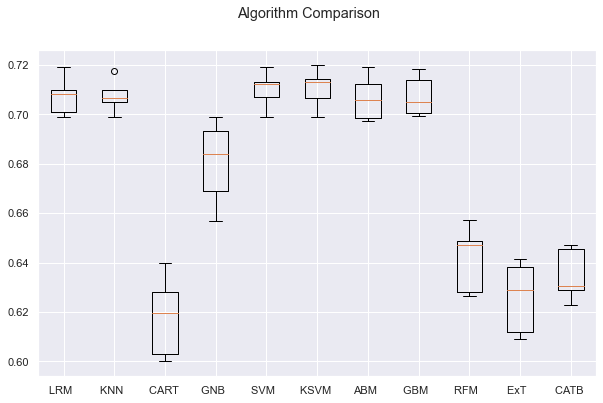

In [63]:
# Compare Algorithms
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()